In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-deep')
from sklearn.metrics import confusion_matrix
import nltk
# nltk.download('stopwords')

/tmp/ipykernel_15261/2695958612.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


In [2]:
# Load the first dataset and shuffle the rows
dataframe1 = pd.read_csv('twitter_validation.csv', encoding='latin1')
dataframe1 = dataframe1.sample(frac=1)
dataframe1

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tomâs great auntie as âHayley canât get out of bedâ and told to his grandma, who now thinks Iâm a lazy, terrible person ð¤£"
827,1857,CallOfDutyBlackopsColdWar,Negative,Score Streaks are the worst thing to happen in...
33,6650,Fortnite,Negative,Fortnite is running like ass.. fps drops every...
648,10391,PlayerUnknownsBattlegrounds(PUBG),Positive,3 years ago this week. ð­\n\nSuch a good tim...
740,1579,Battlefield,Negative,Update: I did not do this\n\nI played battlefi...
385,9864,PlayStation5(PS5),Neutral,I don't know what you people have been doing o...
...,...,...,...,...
936,9496,Overwatch,Positive,Donât tweet much but hereâs what Iâve be...
428,6494,Fortnite,Negative,Looking at pc specs: yeah this will run fortni...
512,7782,MaddenNFL,Negative,@EAMaddenNFL servers down?
298,8719,NBA2K,Negative,@NBA2K you guys gotta fix the shooting bugs bc...


# **Exploratory Data Analysis**

In [3]:
print(dataframe1.columns[-1])

I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tomâs great auntie as âHayley canât get out of bedâ and told to his grandma, who now thinks Iâm a lazy, terrible person ð¤£


In [4]:
dataframe1 = dataframe1.rename(columns={'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tomâs great auntie as âHayley canât get out of bedâ and told to his grandma, who now thinks Iâm a lazy, terrible person ð¤£':'text'})
dataframe1

,3364,Facebook,Irrelevant,text
827,1857,CallOfDutyBlackopsColdWar,Negative,Score Streaks are the worst thing to happen in...
33,6650,Fortnite,Negative,Fortnite is running like ass.. fps drops every...
648,10391,PlayerUnknownsBattlegrounds(PUBG),Positive,3 years ago this week. ð­\n\nSuch a good tim...
740,1579,Battlefield,Negative,Update: I did not do this\n\nI played battlefi...
385,9864,PlayStation5(PS5),Neutral,I don't know what you people have been doing o...
...,...,...,...,...
936,9496,Overwatch,Positive,Donât tweet much but hereâs what Iâve be...
428,6494,Fortnite,Negative,Looking at pc specs: yeah this will run fortni...
512,7782,MaddenNFL,Negative,@EAMaddenNFL servers down?
298,8719,NBA2K,Negative,@NBA2K you guys gotta fix the shooting bugs bc...


In [5]:
dataframe1.shape

(999, 4)

In [6]:
dataframe1.isna()

,3364,Facebook,Irrelevant,text
827,False,False,False,False
33,False,False,False,False
648,False,False,False,False
740,False,False,False,False
385,False,False,False,False
...,...,...,...,...
936,False,False,False,False
428,False,False,False,False
512,False,False,False,False
298,False,False,False,False


In [7]:
dataframe1.isna().sum()

3364          0
Facebook      0
Irrelevant    0
text          0
dtype: int64

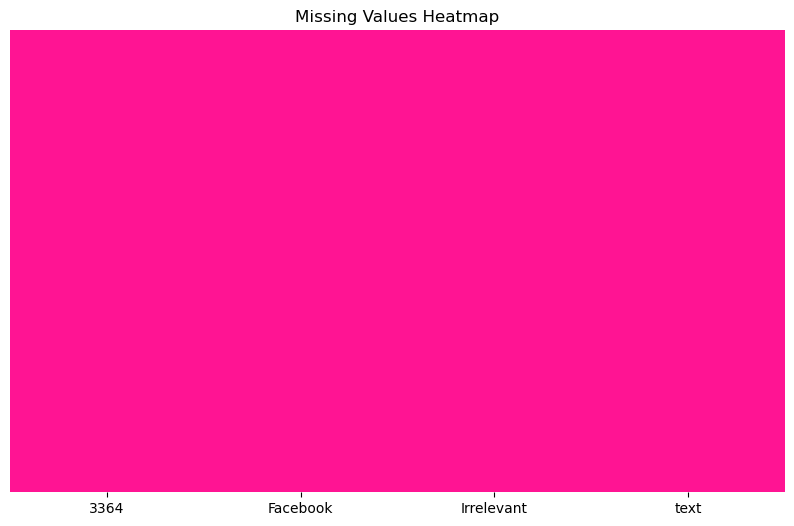

In [8]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
custom_cmap = sns.color_palette(["#FF1493", "#D3D3D3"])
sns.heatmap(dataframe1.isnull(), cmap=custom_cmap, cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
class_distribution_Facebook = dataframe1['Facebook'].value_counts()
print(class_distribution_Facebook)

Facebook
RedDeadRedemption(RDR)               40
johnson&johnson                      39
PlayerUnknownsBattlegrounds(PUBG)    38
FIFA                                 38
LeagueOfLegends                      37
ApexLegends                          36
Nvidia                               35
GrandTheftAuto(GTA)                  35
TomClancysRainbowSix                 35
Fortnite                             34
Amazon                               34
Borderlands                          33
AssassinsCreed                       33
PlayStation5(PS5)                    33
Facebook                             32
Verizon                              32
CS-GO                                32
Overwatch                            32
Hearthstone                          32
CallOfDuty                           31
WorldOfCraft                         30
Cyberpunk2077                        30
MaddenNFL                            29
Microsoft                            28
Dota2                          

In [10]:
# Assuming binary classification
ratio_majority_minority_Facebook = class_distribution_Facebook[0] / class_distribution_Facebook[1]
print(f"Ratio between majority and minority classes: {ratio_majority_minority_Facebook}")

Ratio between majority and minority classes: 1.0256410256410255


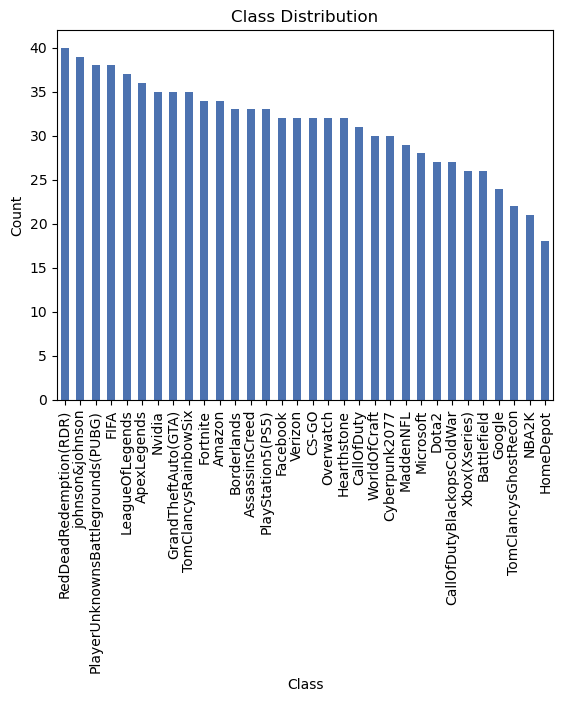

In [11]:
import matplotlib.pyplot as plt

# Plot class distribution
class_distribution_Facebook.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [12]:
 class_distribution_Irrelevant = dataframe1['Irrelevant'].value_counts()
print(class_distribution_Irrelevant)

Irrelevant
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64


In [13]:
# Assuming binary classification
ratio_majority_minority_Irrelevant = class_distribution_Irrelevant[0] / class_distribution_Irrelevant[1]
print(f"Ratio between majority and minority classes: {ratio_majority_minority_Irrelevant}")

Ratio between majority and minority classes: 1.0288808664259927


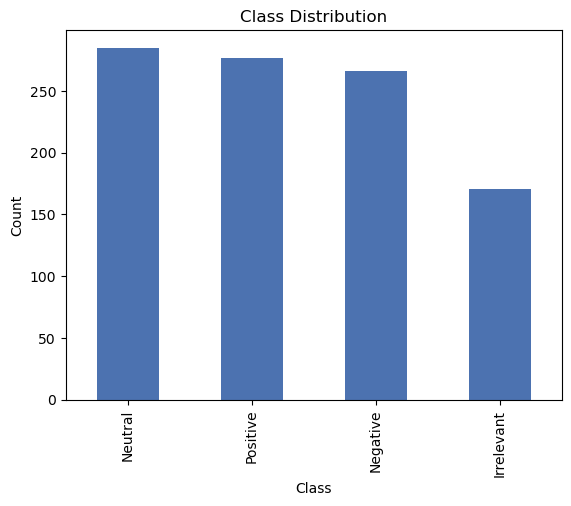

In [14]:
import matplotlib.pyplot as plt

# Plot class distribution
class_distribution_Irrelevant.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [15]:
set(dataframe1[['Facebook']].values.ravel()) # set() fetch the unique data only

{'Amazon',
 'ApexLegends',
 'AssassinsCreed',
 'Battlefield',
 'Borderlands',
 'CS-GO',
 'CallOfDuty',
 'CallOfDutyBlackopsColdWar',
 'Cyberpunk2077',
 'Dota2',
 'FIFA',
 'Facebook',
 'Fortnite',
 'Google',
 'GrandTheftAuto(GTA)',
 'Hearthstone',
 'HomeDepot',
 'LeagueOfLegends',
 'MaddenNFL',
 'Microsoft',
 'NBA2K',
 'Nvidia',
 'Overwatch',
 'PlayStation5(PS5)',
 'PlayerUnknownsBattlegrounds(PUBG)',
 'RedDeadRedemption(RDR)',
 'TomClancysGhostRecon',
 'TomClancysRainbowSix',
 'Verizon',
 'WorldOfCraft',
 'Xbox(Xseries)',
 'johnson&johnson'}

In [16]:
dataframe1.groupby('Facebook').Facebook.count()

Facebook
Amazon                               34
ApexLegends                          36
AssassinsCreed                       33
Battlefield                          26
Borderlands                          33
CS-GO                                32
CallOfDuty                           31
CallOfDutyBlackopsColdWar            27
Cyberpunk2077                        30
Dota2                                27
FIFA                                 38
Facebook                             32
Fortnite                             34
Google                               24
GrandTheftAuto(GTA)                  35
Hearthstone                          32
HomeDepot                            18
LeagueOfLegends                      37
MaddenNFL                            29
Microsoft                            28
NBA2K                                21
Nvidia                               35
Overwatch                            32
PlayStation5(PS5)                    33
PlayerUnknownsBattlegrounds(PUB

In [17]:
set(dataframe1['Irrelevant'].unique()) # set() fetch the unique data only

{'Irrelevant', 'Negative', 'Neutral', 'Positive'}

In [18]:
dataframe1.groupby('Irrelevant').Irrelevant.count()

Irrelevant
Irrelevant    171
Negative      266
Neutral       285
Positive      277
Name: Irrelevant, dtype: int64

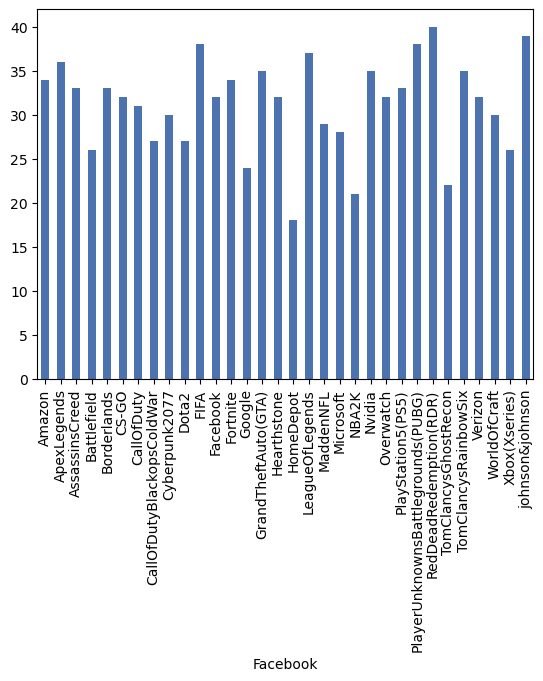

In [19]:
#Analyzing data
dataframe1.groupby('Facebook').Facebook.count().plot.bar()
plt.show()

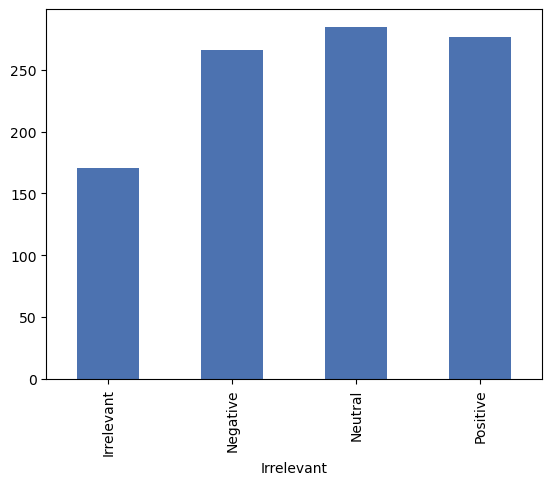

In [20]:
#Analyzing data
dataframe1.groupby('Irrelevant').Irrelevant.count().plot.bar()
plt.show()

In [21]:
# Group by 'Borderlands' and 'Positive' columns and count occurrences
grouped_data = dataframe1.groupby(['Facebook', 'Irrelevant']).size().unstack()
grouped_data

Irrelevant,Irrelevant,Negative,Neutral,Positive
Facebook,,,,
Amazon,3.0,6.0,18.0,7.0
ApexLegends,3.0,6.0,17.0,10.0
AssassinsCreed,1.0,4.0,4.0,24.0
Battlefield,12.0,7.0,4.0,3.0
Borderlands,2.0,5.0,12.0,14.0
CS-GO,8.0,2.0,13.0,9.0
CallOfDuty,11.0,8.0,7.0,5.0
CallOfDutyBlackopsColdWar,8.0,3.0,6.0,10.0
Cyberpunk2077,8.0,1.0,4.0,17.0


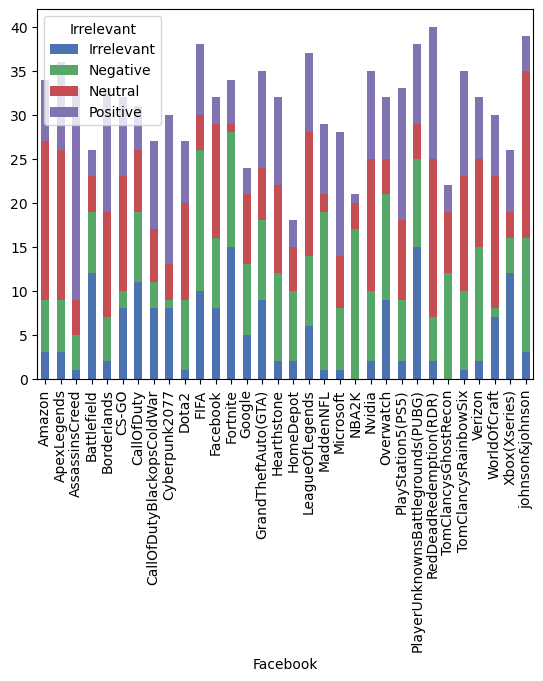

In [22]:
# Group by 'Borderlands' and 'Positive' columns and count occurrences
grouped_data = dataframe1.groupby(['Facebook', 'Irrelevant']).size().unstack()

# Plotting
grouped_data.plot(kind='bar', stacked=True)
plt.show()

Let's make a new column to detect how long the text messages are

In [23]:
dataframe1['Length'] = dataframe1['text'].apply(len)
dataframe1

,3364,Facebook,Irrelevant,text,Length
827,1857,CallOfDutyBlackopsColdWar,Negative,Score Streaks are the worst thing to happen in...,74
33,6650,Fortnite,Negative,Fortnite is running like ass.. fps drops every...,56
648,10391,PlayerUnknownsBattlegrounds(PUBG),Positive,3 years ago this week. ð­\n\nSuch a good tim...,240
740,1579,Battlefield,Negative,Update: I did not do this\n\nI played battlefi...,79
385,9864,PlayStation5(PS5),Neutral,I don't know what you people have been doing o...,126
...,...,...,...,...,...
936,9496,Overwatch,Positive,Donât tweet much but hereâs what Iâve be...,223
428,6494,Fortnite,Negative,Looking at pc specs: yeah this will run fortni...,101
512,7782,MaddenNFL,Negative,@EAMaddenNFL servers down?,26
298,8719,NBA2K,Negative,@NBA2K you guys gotta fix the shooting bugs bc...,194


Let's see the percentage of ham and spam in our dataset

In [24]:
dataframe1['Length'].describe()

count    999.000000
mean     133.767768
std       82.605942
min        3.000000
25%       69.000000
50%      116.000000
75%      191.500000
max      352.000000
Name: Length, dtype: float64

# **Text Cleaning**

Let’s clean the text for the messages in our dataset with NLP.

In [25]:
import string
from nltk.corpus import stopwords
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
mess = '''For me / @the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..'''

In [27]:
nopunc = ''.join([char for char in mess if char not in string.punctuation])
print(nopunc)

For me  the love should start with attractioni should feel that I need her every time around meshe should be the first thing which comes in my thoughtsI would start the day and end it with hershe should be there every time I dreamlove will be then when my every breath has her namemy life should happen around hermy life will be named to herI would cry for herwill give all my happiness and take all her sorrowsI will be ready to fight with anyone for herI will be in love when I will be doing the craziest things for herlove will be when I dont have to proove anyone that my girl is the most beautiful lady on the whole planetI will always be singing praises for herlove will be when I start up making chicken curry and end up makiing sambarlife will be the most beautiful thenwill get every morning and thank god for the day because she is with meI would like to say a lotwill tell later


In [28]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/kali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Let's create the function to remove all punctuation, remove all stopwords and returns a list of the cleaned text

In [29]:
def text_process(message):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in message if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Now just remove any stopwords
    # split() convert data into list
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] 

**Vectorization**

***CountVectorizer :*** CountVectorizer is a feature extraction technique used to convert a collection of text documents to a matrix of token counts.

Now we have the messages as lists and we need to convert each of those messages into a vector that SciKit Learn's algorithm models can work with.

In [1]:

from sklearn.feature_extraction.text import CountVectorizer
## text_process function is calling by passing parameter dataframe1['text']
bow_transformer = CountVectorizer(analyzer=text_process).fit(dataframe1['text'])
bow_transformer

NameError: name 'text_process' is not defined

In [ ]:
# bow_transformer.vocabulary_

In [32]:
print(len(bow_transformer.vocabulary_))

6366


In [33]:
message4 = dataframe1['text'][3]
print(message4)

Now the President is slapping Americans in the face that he really did commit an unlawful act after his  acquittal! From Discover on Google vanityfair.com/news/2020/02/tâ¦


Now let's transform the entire DataFrame of messages and create sparse matrix

In [34]:
messages_bow = bow_transformer.transform(dataframe1['text'])
messages_bow

<999x6366 sparse matrix of type '<class 'numpy.int64'>'
	with 12772 stored elements in Compressed Sparse Row format>

In [35]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (999, 6366)


# **TF-IDF**

Now let's compute term weighting and do normalisation with TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(messages_bow)
print(tfidf4)

  (0, 6319)	0.36059446941776324
  (0, 6110)	0.3147971973019245
  (0, 5715)	0.2566615725537905
  (0, 3720)	0.32595017046310565
  (0, 2222)	0.2979799251808277
  (0, 1956)	0.36059446941776324
  (0, 1817)	0.36059446941776324
  (0, 1455)	0.28541893895861
  (0, 534)	0.3147971973019245
  (0, 373)	0.2633356262261702
  (1, 6123)	0.33394943887719114
  (1, 5244)	0.3885409616328563
  (1, 4220)	0.21887166778709424
  (1, 3518)	0.3885409616328563
  (1, 3352)	0.3885409616328563
  (1, 3250)	0.4298378543812601
  (1, 2527)	0.32308693523033283
  (1, 824)	0.31390281925834373
  (2, 6320)	0.2054638098136889
  (2, 6293)	0.17948888355678894
  (2, 6231)	0.24237113829450452
  (2, 6137)	0.17948888355678894
  (2, 6029)	0.172513343304359
  (2, 5751)	0.1452705496694914
  (2, 5697)	0.19579927496774086
  :	:
  (997, 4220)	0.11224090756647277
  (997, 4112)	0.20803959113121873
  (997, 4111)	0.20803959113121873
  (997, 3700)	0.144506460937342
  (997, 3672)	0.44085551474033935
  (997, 3656)	0.17807233724091856
  (997, 359

In [37]:
print(tfidf4.shape)

(999, 6366)


In [38]:
# from sklearn.svm import SVC
# from datetime import datetime
# start_time = datetime.now()

# model = SVC()
# model.fit(x_train,y_train)

# end_time = datetime.now()
# process_time = round(end_time-start_time,2)
# print("Fitting SVC took {} seconds".format(process_time))

**Train Test Split**

In [39]:
from sklearn.model_selection import train_test_split

text_train, text_test, label_train, label_test = train_test_split(dataframe1['text'], dataframe1['Irrelevant'], test_size=0.2,shuffle=True)



**Creating a Data Pipeline**

Let's run our model again and then predict the test set. We will create and use a pipeline for this purpose

In [40]:
# from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM      # accuracy = 0.54
#     ('clf', BalancedRandomForestClassifier(n_estimators=100, random_state=42)) # Accuracy: 0.475
])

In [41]:
pipeline.fit(text_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])

In [42]:
text_test.iloc[1:2].values

array(['First Community ban with 13/11 K/D after killing someone via shooting his exposed legs. I wonder that me who struggled getting 1+ K/D would be suspected hacking, why that 30/0 K/D guy was not the first one, or is this the complement for my skill? #BattlefieldV #CommunityGames pic.twitter.com/jFbEfGFNV7'],
      dtype=object)

In [43]:
predictions = pipeline.predict(text_test)
predictions

array(['Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Negative', 'Negative', 'Positive', 'Negative',
       'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive',
       'Positive', 'Positive', 'Neutral', 'Neutral', 'Negative',
       'Negative', 'Neutral', 'Positive', 'Neutral', 'Neutral',
       'Positive', 'Negative', 'Neutral', 'Neutral', 'Neutral',
       'Positive', 'Neutral', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Neutral', 'Positive', 'Neutral',
       'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Positive', 'Negative', 'Neutral', 'Negative', 'Positive',
       'Negative', 'Negative', 'Neutral', 'Positive', 'Positive',
       'Positive', 'Neutral', 'Positive', 'Positive', 'Negative',
       'Neutral', 'Negative', 'Negative', 'Neutral', 'Neutral',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Neutral', 'Pos

In [44]:
class_names = np.array(['Irrelevant', 'Negative', 'Neutral', 'Positive'])

# **Making Confusion Matrix**

Confusion Matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

In [45]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(label_test,predictions)
print(cm)

[[ 0 12 10 15]
 [ 0 34 10  8]
 [ 0  2 44 13]
 [ 0  9  9 34]]


In [46]:
# confusion matrix and classification report(precision, recall, F1-score)
# ytest = np.array(label_test)
print(classification_report(pipeline.predict(text_test),label_test))

              precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00         0
    Negative       0.65      0.60      0.62        57
     Neutral       0.75      0.60      0.67        73
    Positive       0.65      0.49      0.56        70

    accuracy                           0.56       200
   macro avg       0.51      0.42      0.46       200
weighted avg       0.69      0.56      0.62       200



/home/kali/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


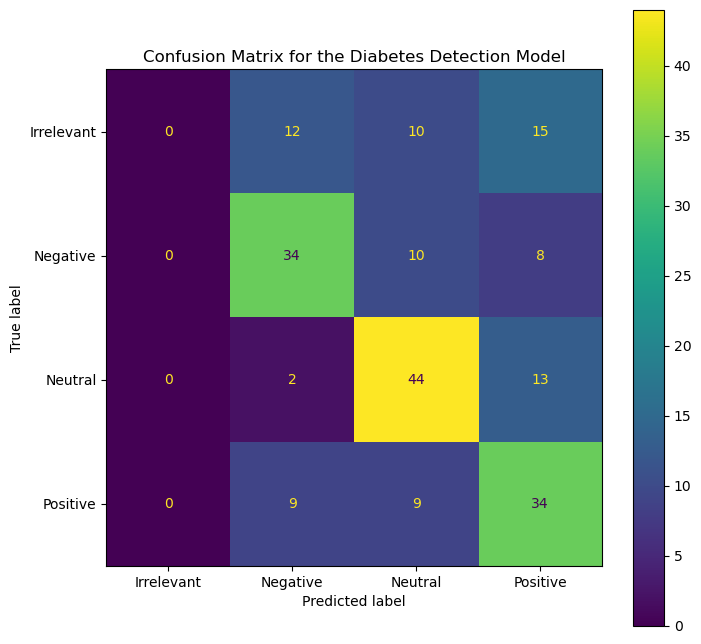

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
class_names =['Irrelevant', 'Negative', 'Neutral', 'Positive']
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [48]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(predictions,label_test))

Accuracy: 0.56


In [49]:
# file = open('/content/news.txt','r')
# news = file.read()
# file.close()

sentiment = input("Enter sentiment = ")
sentiment_data = {'predict_sentiment':[sentiment]}
sentiment_data_df = pd.DataFrame(sentiment_data)

predict_sentiment_cat = pipeline.predict(sentiment_data_df['predict_sentiment'])
print("Predicted news category = ",predict_sentiment_cat[0])

Enter sentiment = sdf rdafvert ddg b[]\
Predicted news category =  Neutral
